In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from MakeSTFTs import *
from Train import *
from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 930 STFTs from STFTs.pkl
Augmenting using 70 random mixes
Using 1000 STFTs


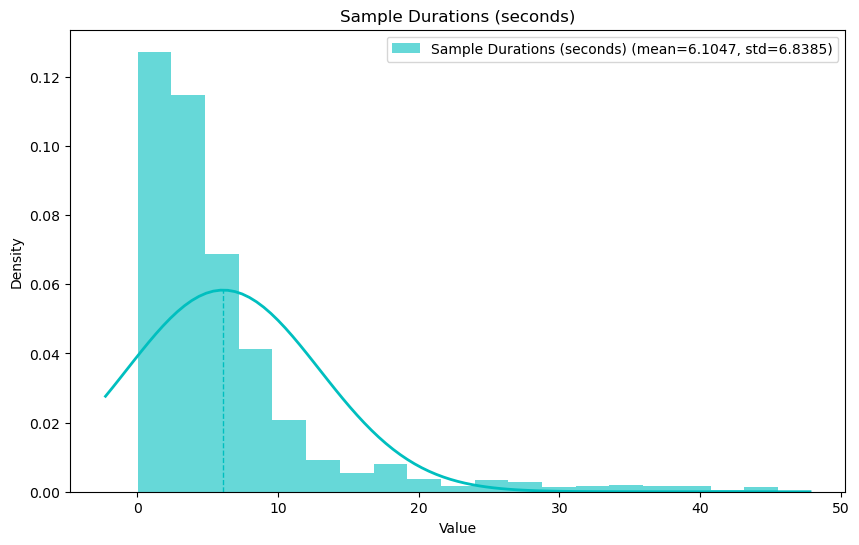

Input STFTs: torch.Size([1000, 1024, 114]) x torch.float32
Using model=Hybrid_CNN
Optimising hyper-parameters:


[Integer(low=16, high=512, prior='log-uniform', transform='identity'),
 Real(low=1e-06, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-08, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=3, high=4, prior='uniform', transform='identity'),
 Integer(low=5, high=6, prior='uniform', transform='identity'),
 Integer(low=30, high=31, prior='uniform', transform='identity')]




Hyper-Parameter tuning#1

train_model: hyper-parameters=[482, 0.0004374314456305422, 1.0566652342572236e-08, 4, 6, 30]
opt_params=[482, 0.0004374314456305422, 1.0566652342572236e-08], model_params=[4, 6, 30]
optimiser: batch=482, learning_rate=0.0004, weight_decay=1e-08
approx_size=59,896 parameters
Hybrid_CNN: kernels=4, kernel_size=6, rnn_hidden=30
encoder_conv1d: layer=Conv1d(1024, 4, kernel_size=(6,), stride=(1,)), input=torch.Size([7, 1024, 114]) --> output=torch.Size([7, 4, 109])
x.view=torch.Size([7, 109, 4])
encoder_rnn: layer=GRU(4, 30, batch_first=True), input=torch.Size([7, 109, 4]) --> output=torch.Size([7, 109, 30])
latent=torch.Size([7, 3270])
decoder_rnn: layer=GRU(30, 4, batch_first=True), input=torch.Size([7, 109, 30]) --> output=torch.Size([7, 109, 4])
x.view=torch.Size([7, 4, 109])
decoder_conv1d: layer=ConvTranspose1d(4, 1024, kernel_size=(6,), stride=(1,)), input=torch.Size([7, 4, 109]) --> output=torch.Size([7, 1024, 114])
model created successfully!


model=Hy

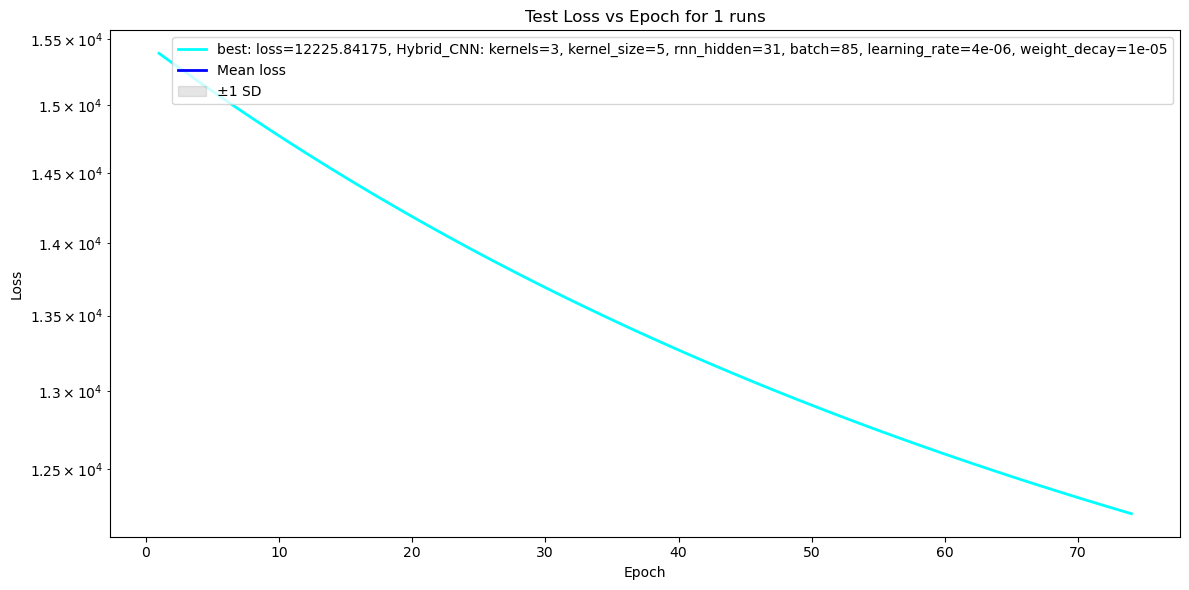




Hyper-Parameter tuning#3

train_model: hyper-parameters=[203, 0.004374314456305422, 0.00033414688645682055, 3, 6, 31]
opt_params=[203, 0.004374314456305422, 0.00033414688645682055], model_params=[3, 6, 31]
optimiser: batch=203, learning_rate=0.004, weight_decay=0.0003
approx_size=46,615 parameters
Hybrid_CNN: kernels=3, kernel_size=6, rnn_hidden=31
encoder_conv1d: layer=Conv1d(1024, 3, kernel_size=(6,), stride=(1,)), input=torch.Size([7, 1024, 114]) --> output=torch.Size([7, 3, 109])
x.view=torch.Size([7, 109, 3])
encoder_rnn: layer=GRU(3, 31, batch_first=True), input=torch.Size([7, 109, 3]) --> output=torch.Size([7, 109, 31])
latent=torch.Size([7, 3379])
decoder_rnn: layer=GRU(31, 3, batch_first=True), input=torch.Size([7, 109, 31]) --> output=torch.Size([7, 109, 3])
x.view=torch.Size([7, 3, 109])
decoder_conv1d: layer=ConvTranspose1d(3, 1024, kernel_size=(6,), stride=(1,)), input=torch.Size([7, 3, 109]) --> output=torch.Size([7, 1024, 114])
model created successfully!


model=Hybr

In [ ]:
from HyperParameterTuning import *

optimise_hyper_parameters()
#train_best_params()

In [ ]:
# Test every sample and measure the error.
#test_all()


In [ ]:
# Generate some new samples, either by interpolation or randome perturbation
from Generate import *

#generate_morphs()

#generate_variations()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

# Generate samples from each variable
#generate_main_encodings()